<a href="https://colab.research.google.com/github/immisius/Advanced-Machine-Learning/blob/main/Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Problem 2

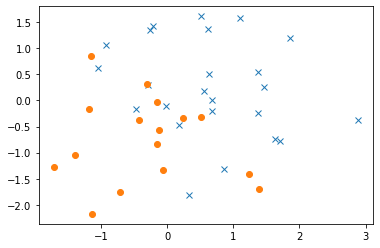

In [1]:
# requirement
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

# prepare dataset
np.random.seed(3846)
n = 40
omega = np.random.randn()
noise = 0.8 * np.random.randn(n)

x = np.random.randn(n, 2) + 0
y = 2 * (omega * x[:,0] + x[:,1] + noise > 0) - 1

plt.plot(np.extract(y>0,x[:,0]),np.extract(y>0,x[:,1]), 'x')
plt.plot(np.extract(y<0,x[:,0]),np.extract(y<0,x[:,1]), 'o')

In [2]:
# condition
A = np.array([[  3, 0.5],
              [0.5,   1]])
mu = np.array([[1],
               [2]])

In [3]:
eig_v,v=np.linalg.eig(2*A)
L=max(eig_v)
L

6.23606797749979

In [4]:
def PSI(w):
  return (w-mu).T@A@(w-mu)
def OMEGA(w):
  return np.linalg.norm(w,ord=1)
def O(w):
  return PSI(w)+OMEGA(w)
def nabla_PSI(w):
  return 2*A@(w-mu)
eta=1/L

In [5]:
w_hat_lam = []
lams = np.arange(0, 6, 0.1)
w_hat=np.ones([2,1])
for lam in lams:
  ### implement PG ###
  while True:
    next_w=np.ones([2,1])
    arg=w_hat-eta*nabla_PSI(w_hat)
    for i in range(2):
      v=w_hat[i]-sum([2*A[i][j]*(w_hat[j]-arg[j]) for j in range(2)])
      print(v)
      if v>lam:
        next_w[i]=v-lam
      if abs(v)<=lam:
        next_w[i]=0
      if v<-lam:
        next_w[i]=v+lam
    if abs(O(w_hat)-O(next_w))<=1e-5:
      break
    w_hat=next_w
  w_hat_lam.append(w_hat)
  ###
plt.plot(lams, w_hat_lam)

[2.28285965]
[1.80178728]
[-5.07435736]
[0.31498283]
[33.12781756]
[9.45855614]
[-167.06206223]
[-37.7371002]
[881.0652397]
[209.72364019]
[-4607.0409057]
[-1085.82672067]
[24129.0357251]
[5697.84866606]
[-126335.02504886]
[-29821.89389131]
[661505.02025933]
[156161.91418008]
[-3463679.01491371]
[-817661.93682448]
[18136065.01167516]
[4281345.95054315]
[-94961663.00877763]
[-22417405.9628171]
[4.97225729e+08]
[1.17379074e+08]
[-2.60350771e+09]
[-6.14604798e+08]
[1.36321434e+10]
[3.21811251e+09]
[-7.13788293e+10]
[-1.68502559e+10]
[3.73744402e+11]
[8.82290852e+10]
[-1.9569511e+12]
[-4.61973488e+11]
[1.0246729e+13]
[2.41892458e+12]
[-5.36525695e+13]
[-1.26656536e+13]
[2.80928501e+14]
[6.6318223e+13]
[-1.47096073e+15]
[-3.47246724e+14]
[7.70205036e+15]
[1.81820745e+15]
[-4.03284593e+16]
[-9.52025781e+15]
[2.11162554e+17]
[4.98487171e+16]
[-1.10566149e+18]
[-2.61011271e+17]
[5.78931871e+18]
[1.36667276e+18]
[-3.03132663e+19]
[-7.15599147e+18]
[1.58722323e+20]
[3.74692578e+19]
[-8.31080873e

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: RuntimeWarning: invalid value encountered in subtract



[5.15428108e+228]
[1.21676071e+228]
[-2.69881661e+229]
[-6.37104179e+228]
[1.41311872e+230]
[3.33592079e+229]
[-7.3991857e+230]
[-1.7467108e+230]
[3.87426393e+231]
[9.1458965e+230]
[-2.02859093e+232]
[-4.78885358e+231]
[1.062184e+233]
[2.50747629e+232]
[-5.56166763e+233]
[-1.31293163e+233]
[2.91212698e+234]
[6.87459926e+233]
[-1.52480948e+235]
[-3.5995869e+234]
[7.9840061e+235]
[1.88476817e+235]
[-4.18047987e+236]
[-9.86877427e+235]
[2.18892768e+237]
[5.16735729e+236]
[-1.14613741e+238]
[-2.70566341e+237]
[6.0012534e+238]
[1.41670375e+238]
[-3.14229707e+239]
[-7.41795715e+238]
[1.64532811e+240]
[3.88409279e+239]
[-8.61504982e+240]
[-2.03373739e+240]
[4.51089865e+241]
[1.06487872e+241]
[-2.3619372e+242]
[-5.57577737e+241]
[1.23672637e+243]
[2.91951493e+242]
[-6.47558335e+243]
[-1.52867787e+243]
[3.39065946e+244]
[8.00426122e+243]
[-1.77537234e+245]
[-4.19108558e+244]
[9.29597028e+245]
[2.1944809e+245]
[-4.86743323e+246]
[-1.14904512e+246]
[2.54862113e+247]
[6.01647835e+246]
[-1.3344753

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: overflow encountered in matmul
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: RuntimeWarning: invalid value encountered in subtract
  


ストリーミング出力は最後の 5000 行に切り捨てられました。
[3.73744402e+11]
[8.82290852e+10]
[-1.9569511e+12]
[-4.61973488e+11]
[1.0246729e+13]
[2.41892458e+12]
[-5.36525695e+13]
[-1.26656536e+13]
[2.80928501e+14]
[6.6318223e+13]
[-1.47096073e+15]
[-3.47246724e+14]
[7.70205036e+15]
[1.81820745e+15]
[-4.03284593e+16]
[-9.52025781e+15]
[2.11162554e+17]
[4.98487171e+16]
[-1.10566149e+18]
[-2.61011271e+17]
[5.78931871e+18]
[1.36667276e+18]
[-3.03132663e+19]
[-7.15599147e+18]
[1.58722323e+20]
[3.74692578e+19]
[-8.31080873e+20]
[-1.96191581e+20]
[4.35159594e+21]
[1.02727245e+21]
[-2.27852522e+22]
[-5.3788684e+21]
[1.19305129e+23]
[2.81641206e+22]
[-6.24689767e+23]
[-1.4746925e+23]
[3.27091808e+24]
[7.72159017e+23]
[-1.71267494e+25]
[-4.0430771e+24]
[8.96768243e+25]
[2.11698265e+25]
[-4.69553948e+26]
[-1.10846651e+26]
[2.45861639e+27]
[5.80400599e+26]
[-1.28734826e+28]
[-3.03901699e+27]
[6.74064297e+28]
[1.59124995e+28]
[-3.52944648e+29]
[-8.33189293e+28]
[1.84804217e+30]
[4.36263578e+29]
[-9.67647443e+30]
[-2.28430575

KeyboardInterrupt: ignored